# Analyzing the Stroop Effect


The Stroop effect, a demonstration of interference in the reaction time of a task, is characterized by an experiment. In this experiment, one group of people participates in both rounds of the experiment. During the first round, after a timer is started, congruent words are displayed. Congruent words are words whose font color matches the word. For example, the word "yellow" being displayed in yellow font would be a congruent word. The participants must name the font color for each congruent word. As soon as they are done with all the words for the first round, the timer is stopped, and the time is recorded. The second round proceeds similarly, except this time, incongruent words are displayed. The font color for incongruent words does not match the word. For example, the word "red" displayed in blue font would be an incongruent word. During this experiement, congruent and incongruent words were all colors.


## Variables
The independent variable for this experiment is type of word displayed: Congruent vs. Incongruent

The dependent variable is the time it takes to finish naming all the colors in a round.

## HYPOTHESES:

H0: μ congruent = μ incongruent

There is no difference between the mean time to finish a round of naming font colors for congruent words versus incongruent words.

HA: μ congruent ≠ μ incongruent

There is a difference between the mean time to finish a round of naming font colors for congruent words versus incongruent words

I will be performing a dependent t-test. I am opting for a dependent t-test because each participant is in both samples. They each participate in a round with congruent words, and then an incongruent words round.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import numpy as np
%matplotlib inline 

In [2]:
df=pd.read_csv('./stroopdata.csv')
df.head()
# Load the data, read it in using pandas, view the head.

,Congruent,Incongruent
0,12.079,19.278
1,16.791,18.741
2,9.564,21.214
3,8.630,15.687
4,14.669,22.803


In [3]:
mean_congruent = df['Congruent'].mean()
std_congruent = df['Congruent'].std()
mean_incongruent = df['Incongruent'].mean()
std_incongruent = df['Incongruent'].std()

In [4]:
mean_congruent
# Mean of times for congruent words

14.051124999999999

In [5]:
std_congruent
# Standard deviation of times for congruent words

3.5593579576451955

In [6]:
mean_incongruent
# Mean of times for incongruent words

22.015916666666666

In [7]:
std_incongruent
# Standard deviation of times for incongruent words

4.7970571224691376

## Visualizations

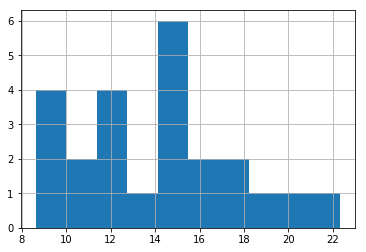

In [8]:
df['Congruent'].hist()
# Histogram for congruent word times. Looks SYMMETRIC.

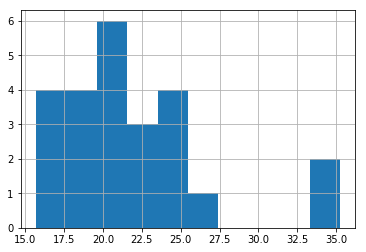

In [9]:
df['Incongruent'].hist()
# Histogram for incongruent word times. Seems to be SKEWED RIGHT.

## Statistical Tests and Results

In [10]:
# Bootsampling in preparation of creating a confidence interval
diffs = []
for i in range(10000):
    bootsample = df.sample(200,replace=True)
    mean_con = bootsample['Congruent'].mean()
    mean_incon = bootsample['Incongruent'].mean()
    diffs.append(mean_con-mean_incon)

(array([   10.,    82.,   458.,  1437.,  2757.,  2970.,  1692.,   507.,
           81.,     6.]),
 array([-9.3237   , -9.0562405, -8.788781 , -8.5213215, -8.253862 ,
        -7.9864025, -7.718943 , -7.4514835, -7.184024 , -6.9165645,
        -6.649105 ]),
 <a list of 10 Patch objects>)

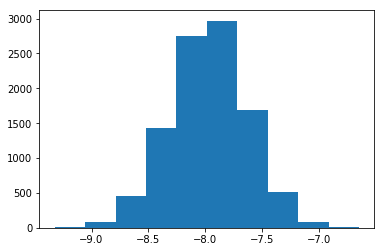

In [11]:
plt.hist(diffs)

In [12]:
np.percentile(diffs,.025), np.percentile(diffs,.975)

(-9.1671116237499994, -8.7767794850000023)

In [13]:
stats.ttest_rel(df['Congruent'],df['Incongruent'])

Ttest_relResult(statistic=-8.020706944109957, pvalue=4.1030005857111781e-08)

The t-statistic is -8.0207. The p-value is 0.0000000410. With an alpha level of .05, we reject the
null hypothesis. Based on this p-value, there is a 0.00000410% probability these results were obtained if the null hypothesis was true. Based on the confidence interval we generated, we are 95% confident that the
difference in time taken to finish a round of naming the colors for the incongruent words and time
taken to finish a round of naming the colors for the congruent words is from 8.76 to 9.12 seconds.
Note that 0 is not in this interval. It seems that there was a significant difference in average time taken to name the colors for the
congruent words versus the incongruent words. This matches up with my expectations.